## Traditional ML pipeline

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import time
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import tqdm

In [23]:
#load in model data (300k rows)
reviews_for_modeling = pd.read_csv(f's3://sagemaker-studio-ai-lab-3/samples/datasets/300k_train_df_forsvmmodel')
reviews_for_modeling_stand = reviews_for_modeling.groupby('r_stars',as_index = False,group_keys=False).apply(lambda s: s.sample(20000,replace=True)).sample(frac=1)
#reviews_for_modeling_sub = reviews_for_modeling.sample(n=, random_state=42)

# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(reviews_for_modeling_stand.drop(columns=['r_stars']), reviews_for_modeling_stand['r_stars'], test_size=0.2, random_state=42)

In [15]:
reviews_for_modeling.r_stars.value_counts()

r_stars
5    124241
4     67915
3     30280
1     29928
2     21670
Name: count, dtype: int64

In [ ]:
################################################
# SVC classification
################################################
start = time.time()

# Running the SVM model
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust parameters like kernel, C, and gamma as needed
svm_model = svm.fit(X_train, y_train)

# Predicting values
y_pred = svm_model.predict(X_test)
end = time.time()
print(start-end)

# Calculate metrics
svm_accuracy = accuracy_score(y_test, y_pred)
svm_conf_matrix = confusion_matrix(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='macro')
svm_recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (macro): {precision:.4f}, Recall (macro): {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

In [78]:
################################################
# Logistic Regression model
################################################
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

log_accuracy = accuracy_score(y_test, y_pred)
log_conf_matrix = confusion_matrix(y_test, y_pred)
log_precision = precision_score(y_test, y_pred, average='macro')
log_recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {log_accuracy:.4f}')
print(f'Precision (macro): {log_precision:.4f}, Recall (macro): {log_recall:.4f}')
print('Confusion Matrix:')
print(log_conf_matrix)

Accuracy: 0.3241
Precision (macro): 0.3269, Recall (macro): 0.3231
Confusion Matrix:
[[774 523 112 350 282]
 [448 603 204 457 238]
 [348 506 295 526 303]
 [229 275 230 742 474]
 [267 189  93 705 827]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
################################################
# RF Classification model
################################################
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, max_depth=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_conf_matrix = confusion_matrix(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='macro')
rf_recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {rf_accuracy:.4f}')
print(f'Precision (macro): {rf_precision:.4f}, Recall (macro): {rf_recall:.4f}')
print('Confusion Matrix:')
print(rf_conf_matrix)

Accuracy: 0.7811
Precision (macro): 0.7801, Recall (macro): 0.7809
Confusion Matrix:
[[3500  428   54    7   10]
 [ 469 3151  379    8    3]
 [  85  437 2955  409   64]
 [  10   28  412 2729  821]
 [  14    4   47  690 3286]]


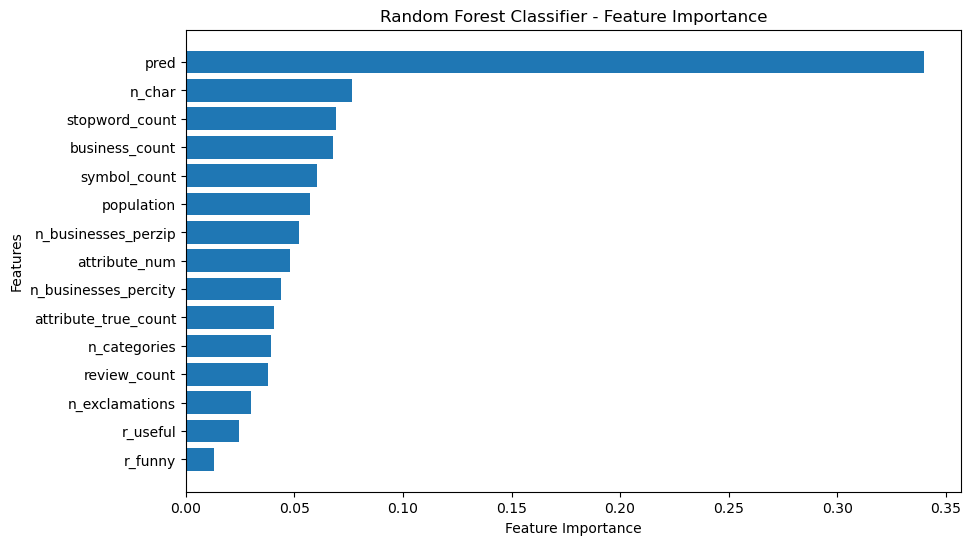

In [80]:
# Sort feature importances in descending order
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::1]

sorted_importance= feature_importance[sorted_idx]

# Sort the feature names based on their importance
feature_names = X_train.columns[sorted_idx]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), sorted_importance, align='center')
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()

In [81]:
################################################
# KNN classification
################################################
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_conf_matrix = confusion_matrix(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='macro')
knn_recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {knn_accuracy:.4f}')
print(f'Precision (macro): {knn_precision:.4f}, Recall (macro): {knn_recall:.4f}')
print('Confusion Matrix:')
print(knn_conf_matrix)

Accuracy: 0.2976
Precision (macro): 0.2992, Recall (macro): 0.2974
Confusion Matrix:
[[873 431 287 217 233]
 [546 662 343 242 157]
 [525 424 547 272 210]
 [418 396 442 417 277]
 [478 379 344 403 477]]


In [10]:
################################################
# gradient boosting classifier
################################################
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb, average='macro')
gb_recall = recall_score(y_test, y_pred_gb, average='macro')

# Print evaluation metrics
print(f'Gradient Boosting Model Metrics:')
print(f'Accuracy: {gb_accuracy:.4f}')
print(f'Precision (macro): {gb_precision:.4f}, Recall (macro): {gb_recall:.4f}')
print('Confusion Matrix:')
print(gb_conf_matrix)

Gradient Boosting Model Metrics:
Accuracy: 0.6835
Precision (macro): 0.6812, Recall (macro): 0.6832
Confusion Matrix:
[[4767 1009  139   14   24]
 [1223 3641 1139   64   10]
 [ 117 1016 3691 1071   93]
 [  17   55  742 3582 1467]
 [  18    7   81 1188 4825]]


## Tuning optimal RF model

In [36]:
reviews_for_modeling.r_stars.value_counts()

r_stars
5    124241
4     67915
3     30280
1     29928
2     21670
Name: count, dtype: int64

In [29]:
#load in test data
test = pd.read_csv(f's3://sagemaker-studio-ai-lab-3/samples/datasets/full_test_withBERTpred')

#load in train data (300k rows)
reviews_for_modeling = pd.read_csv(f's3://sagemaker-studio-ai-lab-3/samples/datasets/300k_train_df_forsvmmodel')
reviews_for_modeling_stand = reviews_for_modeling.groupby('r_stars',as_index = False,group_keys=False).apply(lambda s: s.sample(20000,replace=True)).sample(frac=1)

# Splitting data into test and train
X_train = reviews_for_modeling_stand.drop(columns = ['r_stars'])
y_train = reviews_for_modeling_stand['r_stars']
X_test = test

In [37]:
################################################
# RF Classification model optimized 
################################################
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, max_depth=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [50]:
#load in test_data review_id
dfs = []
for load_num in range(0,70):
    df = pd.read_json(f's3://sagemaker-studio-ai-lab-3/final-data/test_{load_num}.json') 
    dfs.append(df)
reviews = pd.concat (dfs, ignore_index = True)

In [57]:
#upload y_pred as prediction csv
submission_csv = pd.DataFrame({'review_id': reviews['review_id'], 'pred': y_pred})
submission_csv

,review_id,pred
0,s_unrrXlNaGcADomLPwt1g,1
1,EGCLYbrm9PdtxpTccJbsjg,1
2,t1cKG4bbDqNSyAOIul7yyA,5
3,M5QTMFkVIe7yd_yZQ7yhJg,5
4,mYisBnlX7xC1z-brQoRmsA,3
...,...,...
699023,ksWSbGc6qWl_W8-8qaJGqg,5
699024,p0yUpJphnTSheJKDqVCkLQ,1
699025,kNBeMFRVIBafOnjneCClTg,3
699026,aQVvrkukg0zGzPX1ImwFfQ,5


In [58]:
#upload
pred_upload_path = f"s3://sagemaker-studio-ai-lab-3/la/submission2_csv"
submission_csv.to_csv(pred_upload_path, index = False)

## Visualzations

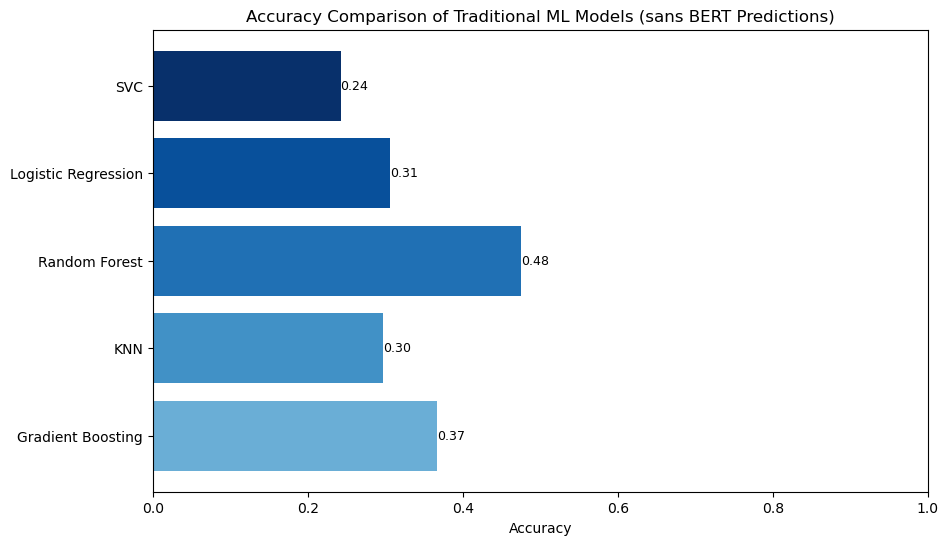

In [75]:
#chart of all models used without including BERT predictions 
#gb_accuracy = 0.3666
#knn_accuracy = 0.2965
#rf_accuracy = 0.4751
# log_accuracy = .31
#svm_accuracy = .24
accuracy_list = [gb_accuracy,knn_accuracy, rf_accuracy,log_accuracy, svm_accuracy]
model_names = ['Gradient Boosting',  'KNN','Random Forest', 'Logistic Regression', 'SVC', ]

# Plotting the accuracies
colors = plt.cm.Blues(np.linspace(.5, 1, len(model_names)))
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracy_list, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{accuracy_list[i]:.2f}', 
             va='center', ha='left', fontsize = 9)
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Traditional ML Models (sans BERT Predictions)')
plt.xlim(0, 1)  # Set the limit from 0 to 1 for accuracy values
plt.show()

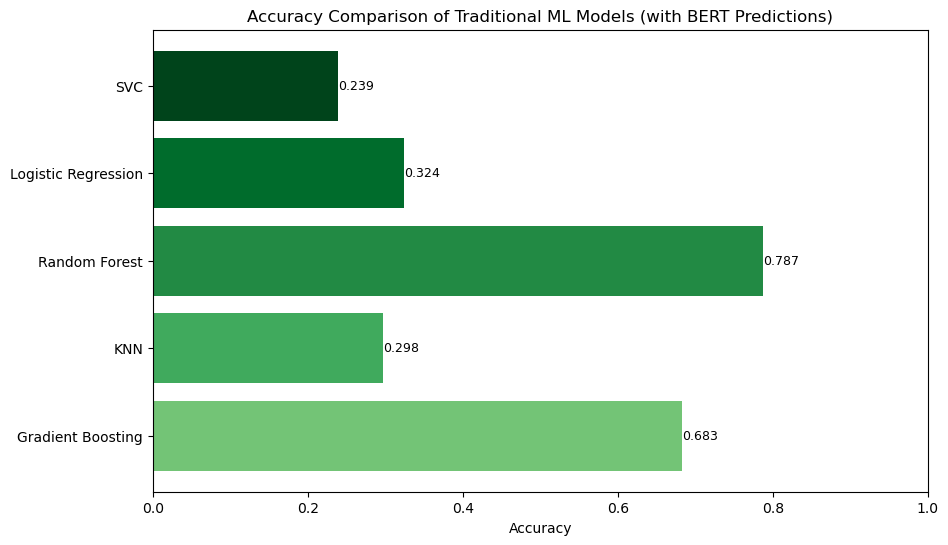

In [59]:
#chart of all models used with BERT pred 
gb_accuracy = 0.6827
knn_accuracy = 0.2976
rf_accuracy = 0.7870
log_accuracy = 0.3241
svm_accuracy = 0.2387
accuracy_list = [gb_accuracy,knn_accuracy, rf_accuracy,log_accuracy, svm_accuracy]
model_names = ['Gradient Boosting',  'KNN','Random Forest', 'Logistic Regression', 'SVC', ]

# Plotting the accuracies
colors = plt.cm.Greens(np.linspace(.5, 1, len(model_names)))
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracy_list, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{accuracy_list[i]:.3f}', 
             va='center', ha='left', fontsize = 9)
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Traditional ML Models (with BERT Predictions)')
plt.xlim(0, 1)  # Set the limit from 0 to 1 for accuracy values
plt.show()